This code performs some investigative analytics on a call data record sample I got online. 

In [44]:
import pandas as pd

In [45]:
import csv

In [46]:
# Read in the actual data in CSV format. Converted to Dataframe.
calls = pd.read_csv('calls.csv')

In [47]:
# Check headers
calls.dtypes

user          int64
other        object
direction    object
duration      int64
timestamp    object
dtype: object

In [48]:
# How the data looks like
calls.head()

,user,other,direction,duration,timestamp
0,7610039694,07434677419,Incoming,211,Wed Sep 15 19:17:44 +0100 2010
1,7641036117,01666472054,Outgoing,31,Mon Feb 11 07:18:23 +0000 1980
2,7641036117,07371326239,Incoming,45,Mon Feb 11 07:45:42 +0000 1980
3,7641036117,07681546436,Outgoing,10,Mon Feb 11 08:04:42 +0000 1980
4,7641036117,07681546436,Outgoing,0,Mon Feb 11 08:05:31 +0000 1980


In [49]:
# The following line of code checks the call frequency of each user in the dataframe. For this notebook, I chose to investigate
# the user with the highest call frequency.

In [50]:
calls.user.value_counts()

7086312446    2306
7456622368    1902
7102745960     976
7389444649     960
7681546436     931
7408255044     709
7817341678     661
7166594208     636
7946912731     603
7163185791     484
7806391587     467
7981267897     440
7110730864     420
7122915122     335
7651896055     170
7304637408     163
7607124303     152
7839321359     126
7784425582     116
7690700998     104
7610039694      82
7541486388      79
7195393761      55
7197268544      54
7641036117      46
7375968743      29
7640835719      29
Name: user, dtype: int64

In [51]:
%matplotlib inline

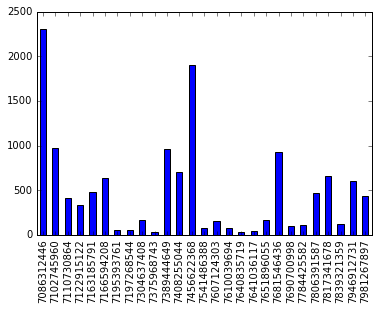

In [52]:
#Plotted on a bar graph

calls.user.value_counts().sort_index().plot(kind='bar')

In [53]:
# Seems like the guy at the top chats up a lot. Let's see if we can dig up more information about him/her

## Question 1: Who does that guy chat with the most?

## Question 2: Who do they chat with the longest? 

## Question 3: Can a linkage be extracted from Q1 and Q2?

## Question 4: What times were the chats frequent?

## Question 5: Is there a pattern with all the above questions?


In [54]:
# Based on the table above. It seems user with the phone no 7086312446 chats the most. I'll take him/her as my Peron
# of Interest (POI).

# I will isolate the POI's number to get the subjects that have been in touch with him/her. Save that in a new list as shown below.

# first_guy_on_list/POI = calls.loc[calls['user'].isin([7086312446])]

poi = calls.loc[calls['user'].isin([7086312446])]

# how many rows are on this table/ what does the call log of this guy look like? 
poi.shape

(2306, 5)

In [55]:
# Works! The user column has the same number meaning this table only has calls the POI got involved in.
poi.head()

,user,other,direction,duration,timestamp
1639,7086312446,07942503106,Incoming,73,Fri Sep 24 00:14:44 +0100 2010
1970,7086312446,07942503106,Incoming,65,Mon Sep 27 20:37:15 +0100 2010
1978,7086312446,07691640598,Outgoing,0,Mon Sep 27 22:11:42 +0100 2010
1979,7086312446,07691640598,Outgoing,1,Mon Sep 27 22:14:55 +0100 2010
1980,7086312446,07691640598,Outgoing,0,Mon Sep 27 22:21:31 +0100 2010


In [56]:
# Okay, pretty neat. I want a quick summary of call frequencies with subjects of our POI's call log.

poi_chat_freq = poi.other.value_counts()

print poi_chat_freq

07691640598    1327
01304635046     368
07304765579     196
01808779834     101
07784386018      84
07837582750      57
07669640510      47
07690019813      40
01626965709      16
07728163425      14
07898649088       9
07942503106       7
07393675257       6
01709610048       6
07451443659       5
07373758307       3
9                 3
07610039694       3
07995434761       2
07783042200       2
07879612231       2
01800332401       1
157               1
07429005133       1
07086312446       1
07541486388       1
04564840007       1
07225298516       1
07939005582       1
Name: other, dtype: int64


In [57]:
# From the record, it seems there is one person who's an outlier. They've recorded the highest chatter with my POI. In other
# words, this person is in contact with my POI the most. 

# this code just serves to show that i can isolate the above subjects to see the frequency of communication between the two.

# Question 1 answered. 

poi_chat_freq['other' == 7691640598]  #just checking

1327

In [58]:
# Question 2: What durations does the subject have with his/her contacts?
'''
This could get confusing so heres some explanation. The count function denotes the frequency of the groupby(number) -> which is 
other in this case. That means; for example, the first record 01304635046 has been registered 1327 times. Hence that person has 
the highest frequecy of occurence. Clear enough? Cool. Min and Max denote the highest and lowest values based on the object that
calls them. In this case, duration. So again; taking the example of the poi, the minimum time he/she was on phone was 0 probably
meaning that this was a missed call. And the highest duration he/she was on phone was 288 seconds/minutes. The mean is a computation
of the average duration spent with the person on the other end. In this scenario, I don't think average helps much because its
calculated based on unique records in the datasets which are not constant. I'll just leave the mean function there for now.
'''
chatter_frequency = poi.groupby('other').duration.agg(['count', 'min', 'max', 'mean'])

chatter_frequency.sort_values('count', ascending=False)

,count,min,max,mean
other,,,,
07691640598,1327,0,2926,90.944989
01304635046,368,0,288,19.383152
07304765579,196,0,149,16.392857
01808779834,101,0,272,30.732673
07784386018,84,0,121,17.702381
07837582750,57,0,41,4.631579
07669640510,47,0,167,14.085106
07690019813,40,0,92,16.500000
01626965709,16,0,120,35.812500


In [59]:
# The results reveal the number in Contact with my POI the most has also logged the most amount of time on phone with the POI.
# Question 3 answered.
# The following code shows that on a bar graph. 

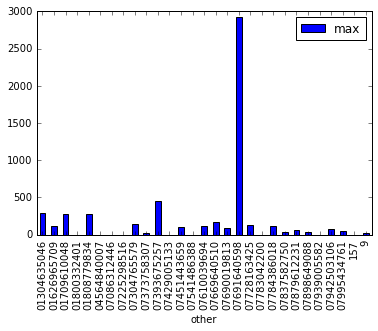

In [60]:
%matplotlib inline
# Both these lines work. The first just shows more options I can add to be computed.

## first_guy_on_list.groupby('other').duration.agg(['count', 'min', 'max', 'mean']).plot(kind='hist')

# I commented out the line above to enhance visibility on the graph I'm about to plot. The other one looked pretty squeezed.

poi.groupby('other').duration.agg(['max']).plot(kind='bar')

In [61]:
# Bonus investigation query. Get all calls with POI involved with durations above 1000.

poi.loc[(poi.duration > 1000) & (poi.direction.isin(['Incoming', 'Outgoing'])), :]

,user,other,direction,duration,timestamp
4793,7086312446,07691640598,Outgoing,1694,Wed Oct 27 22:06:41 +0100 2010
5807,7086312446,07691640598,Incoming,1575,Mon Nov 01 23:10:31 +0000 2010
5958,7086312446,07691640598,Incoming,2326,Wed Nov 03 23:29:29 +0000 2010
6034,7086312446,07691640598,Outgoing,1804,Thu Nov 04 23:44:13 +0000 2010
6308,7086312446,07691640598,Outgoing,2125,Sun Nov 07 23:22:12 +0000 2010
6447,7086312446,07691640598,Outgoing,1201,Tue Nov 09 23:31:12 +0000 2010
6509,7086312446,07691640598,Incoming,1034,Wed Nov 10 23:34:20 +0000 2010
6600,7086312446,07691640598,Incoming,1838,Thu Nov 11 23:11:06 +0000 2010
7014,7086312446,07691640598,Outgoing,1297,Mon Nov 15 23:38:44 +0000 2010
7118,7086312446,07691640598,Incoming,1538,Wed Nov 17 23:29:23 +0000 2010


In [62]:
# Question 4

In [63]:
# Get the data types for respective columns. Of interest is the timestamp colums. I need it in datetime format as oposed to 
# type Object

In [64]:
poi.dtypes

user          int64
other        object
direction    object
duration      int64
timestamp    object
dtype: object

In [65]:
# Play around with the time. I need to change the Timestamp format from object to datetime.

poi.loc[:,'timestamp'] = pd.to_datetime(poi['timestamp'])

In [66]:
# Will check why its making errors above. Meanwhile, Its changed the data type to date time. On to manipulations
poi.dtypes

user                  int64
other                object
direction            object
duration              int64
timestamp    datetime64[ns]
dtype: object

In [25]:
# Question. Which days have the  do talks with POI take place. 

poi.timestamp.dt.weekday_name.value_counts()

Thursday     433
Monday       416
Wednesday    414
Tuesday      340
Friday       311
Saturday     213
Sunday       179
Name: timestamp, dtype: int64

In [26]:
# Thursday appears to be the day most calls happen while Sunday records the least amount of time the POI engages in calls.

In [27]:
# Question: Enumerate the times calls take place.

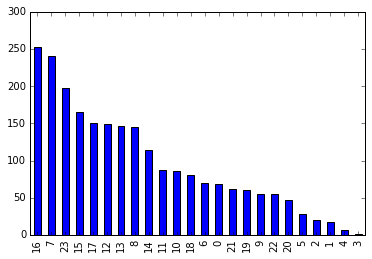

In [28]:
# This is the distribution of calls made for the POI. 

# ie The 16th (1600) hour registered the highest number of calls. The 3rd hour registered the least number of calls.

poi.timestamp.dt.hour.value_counts().plot(kind = 'bar')

In [29]:
# Confirm if this is a true representation of the POI call log number of entries. It is supposed to equal to 2306

poi.timestamp.dt.hour.shape

(2306L,)

In [ ]:
# Question 6 

In [ ]:
# What’s the POI’s credit worthiness - expressed as a ratio of outgoing : incoming?

In [106]:
# This assumes the last two months are December and January

outgoing_ealier_months = poi[(poi['direction'] == "Outgoing") & (poi.timestamp.dt.month <= 10)].duration.mean()

outgoing_latter_months = (poi[(poi['direction'] == "Outgoing") & (poi.timestamp.dt.month > 10)].duration.mean()) * 1.2

outgoing = (outgoing_ealier_months + outgoing_latter_months) / 2

print outgoing

52.4315918664


In [110]:
incoming_earlier_months = poi[(poi['direction'] == "Incoming") & (poi.timestamp.dt.month <= 10)].duration.mean()

incoming_latter_months = poi[(poi['direction'] == "Incoming") & (poi.timestamp.dt.month > 10)].duration.mean() * 1.2

incoming = (incoming_earlier_months + incoming_latter_months) / 2

print incoming

185.185746606


In [111]:
# Ratio of Outgoing : Incoming

# simplification
round(185.185746606/52.4315918664)

4.0

In [95]:
# The credit worthiness of the POI expressed as Outgoing: Incoming is approximately 1:4